In [1]:
import pandas as pd 
import numpy as np
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.drop(["ID#"],axis=1,inplace=True)

In [4]:
df.head() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


# Hierarchical clustering

In [5]:
df_norm=pd.DataFrame(normalize(df),columns=df.columns)
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


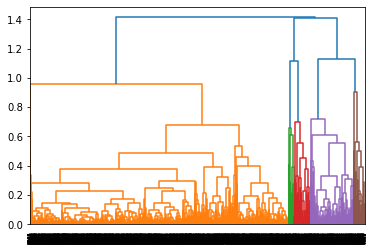

In [6]:
dendogram=sch.dendrogram(sch.linkage(df_norm,method="complete"))


In [7]:
hc=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='complete')


In [8]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [9]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,2
...,...
3994,2
3995,2
3996,2
3997,2


In [10]:
Clusters.value_counts()

Clusters
2           3080
1            509
3            197
0            137
4             70
5              6
dtype: int64

In [11]:
df['h_clusterid']=y_hc
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [12]:
df.groupby("h_clusterid").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,
0,15395.744526,93.620438,3.189781,1.021898,1.109489,44896.007299,17.065693,560.094891,1.708029,4517.262774,1.000000
1,49938.428291,109.797642,3.418468,1.031434,1.049116,40242.673870,18.194499,584.611002,1.722986,4072.086444,0.717092
2,86111.062013,156.252273,1.877922,1.012662,1.002922,13529.853571,11.022078,470.186364,1.405519,4047.757468,0.302273
3,7222.208122,10.177665,1.005076,1.000000,1.000000,1067.822335,3.395939,72.786802,0.213198,4885.304569,0.182741
4,1629.914286,0.000000,1.014286,1.000000,1.000000,652.228571,2.571429,42.142857,0.157143,4828.657143,0.171429
5,7482.000000,4056.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1843.000000,0.000000


# k-means clustering

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [13]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaled_df=scalar.fit_transform(df)

In [14]:
scaled_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01,  1.72345031e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01,  1.72345031e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01,  1.72345031e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.72345031e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  1.72345031e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  1.72345031e-01]])

Text(0, 0.5, 'wcss')

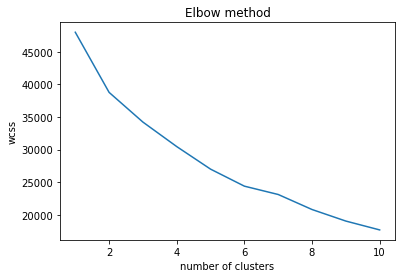

In [18]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
    
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")

In [22]:
cluster_new=KMeans(7,random_state=0)
cluster_new.fit(scaled_df)

KMeans(n_clusters=7, random_state=0)

In [23]:
cluster_new.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [28]:
df["cluster_id"]=cluster_new.labels_
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,2,1
1,19244,0,1,1,1,215,2,0,0,6968,0,2,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,1
3,14776,0,1,1,1,500,1,0,0,6952,0,2,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,2,1


In [26]:
df.groupby("cluster_id").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
cluster_id,,,,,,,,,,,,
0,110445.175510,73.828571,3.073469,1.000000,1.002721,24241.744218,17.059864,183.925170,0.538776,4581.654422,0.000000,1.903401
1,34556.554572,76.412979,1.048968,1.000000,1.000000,2491.296755,5.057817,173.179941,0.507965,3481.088496,0.002950,2.155162
2,68141.280971,233.014049,1.627075,1.000000,1.000000,9958.601533,10.261814,426.068966,1.318008,4308.499361,0.997446,1.849298
3,116710.599002,164.044925,4.221298,1.000000,1.001664,53718.783694,20.683860,461.637271,1.435940,4964.392679,0.940100,1.267887
4,205124.708661,860.685039,2.259843,1.000000,1.000000,34635.078740,28.685039,6041.960630,17.496063,4764.811024,0.826772,1.755906
5,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,0.933333
6,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,1.651163


In [27]:
df.cluster_id.value_counts()

1    1695
2     783
0     735
3     601
4     127
6      43
5      15
Name: cluster_id, dtype: int64